### 导入依赖库

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


### 创建训练数据

In [2]:
num_points = 1000
vectors_set = []

### 随机数据

In [3]:
for i in range(num_points):
    W = 0.1 
    b = 0.4 # y = 0.1 * x + 0.4z
    x1 = np.random.normal(0.0,1.0)
    nd = np.random.normal(0.0,0.05)
    y1 = W * x1 + b

### 加点噪音

In [4]:
y1 = y1 + nd

### 向量化

In [5]:
vectors_set.append([x1,y1])

### 按轴切分

In [6]:
x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]

### 可视化

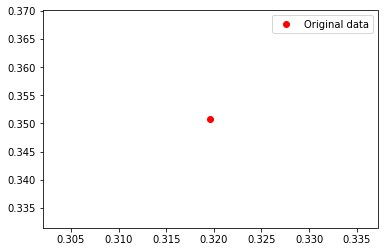

In [13]:
plt.plot(x_data,y_data,'ro',label='Original data')
plt.legend()
plt.show()

## 使用tf

In [14]:
import tensorflow as tf

In [15]:
W = tf.Variable(tf.zeros([1]))

In [16]:
b = tf.Variable(tf.zeros([1]))

In [17]:
y = W * x_data + b

### loss function

In [19]:
loss = tf.reduce_mean(tf.square(y - y_data)) #MSE

### 优化函数GD

In [20]:
optimizer = tf.train.GradientDescentOptimizer(0.6)
train = optimizer.minimize(loss)

### 初始化并执行

In [21]:
init = tf.global_variables_initializer()

In [22]:
sess = tf.Session()

In [23]:
sess.run(init)

In [24]:
for i in range(6):
    sess.run(train)
    print(i,sess.run(W),sess.run(b),sess.run(loss))

0 [0.13453338] [0.42092973] 0.012803644
1 [0.0911355] [0.28514588] 0.0013323267
2 [0.10513482] [0.32894713] 0.0001386391
3 [0.10061892] [0.31481773] 1.44264495e-05
4 [0.10207566] [0.31937557] 1.501123e-06
5 [0.10160575] [0.31790534] 1.5618984e-07


0 [0.10175733] [0.31837958] 1.6254806e-08


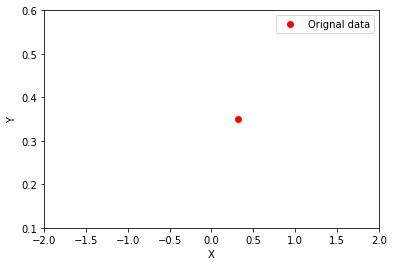

1 [0.10170843] [0.31822658] 1.6938992e-09


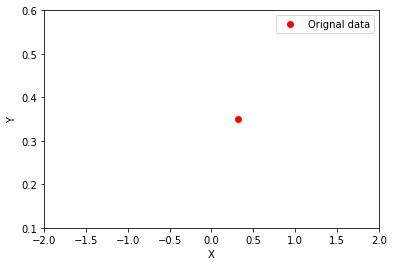

2 [0.10172421] [0.31827596] 1.7588153e-10


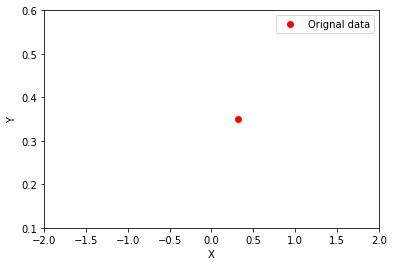

3 [0.10171913] [0.31826004] 1.816236e-11


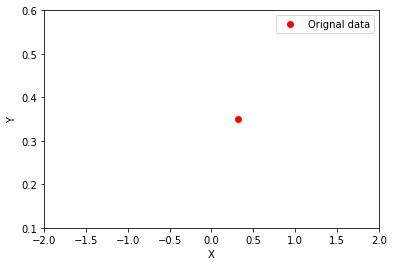

4 [0.10172076] [0.31826517] 1.8793855e-12


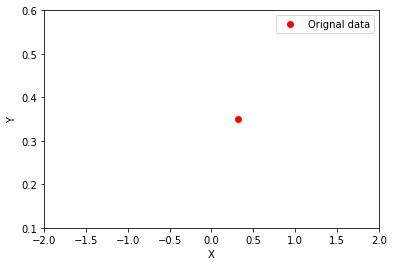

5 [0.10172023] [0.31826353] 1.7408297e-13


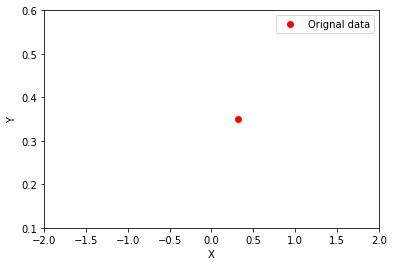

In [25]:
for i in range(6):
    sess.run(train)
    print(i,sess.run(W),sess.run(b),sess.run(loss))
    plt.plot(x_data,y_data, 'ro', label = 'Orignal data')
    plt.xlabel('X')
    plt.xlim(-2,2)
    plt.ylim(0.1,0.6)
    plt.ylabel('Y')
    plt.legend()
    plt.show()

In [26]:
for i in range(16):
    sess.run(train)
    print(i,sess.run(W),sess.run(b),sess.run(loss))

0 [0.10172039] [0.31826404] 1.4210855e-14
1 [0.10172034] [0.3182639] 8.881784e-16
2 [0.10172036] [0.31826392] 0.0
3 [0.10172036] [0.31826392] 0.0
4 [0.10172036] [0.31826392] 0.0
5 [0.10172036] [0.31826392] 0.0
6 [0.10172036] [0.31826392] 0.0
7 [0.10172036] [0.31826392] 0.0
8 [0.10172036] [0.31826392] 0.0
9 [0.10172036] [0.31826392] 0.0
10 [0.10172036] [0.31826392] 0.0
11 [0.10172036] [0.31826392] 0.0
12 [0.10172036] [0.31826392] 0.0
13 [0.10172036] [0.31826392] 0.0
14 [0.10172036] [0.31826392] 0.0
15 [0.10172036] [0.31826392] 0.0


### 高级写法

In [27]:
with tf.name_scope('LinearRegression') as scope:
    W = tf.Variable(tf.zeros([1]))
    b = tf.Variable(tf.zeros([1]))
    y = W * x_data + b

In [28]:
with tf.name_scope('LossFunction') as scope:
    loss = tf.reduce_mean(tf.square(y_data - y))

### tb可视化

In [29]:
loss_summary = tf.summary.scalar('loss',loss)
w_ = tf.summary.histogram('W',W)
b_ = tf.summary.histogram('b',b)

#### 摘要

In [30]:
merged_op = tf.summary.merge_all()

#### 输出摘要

In [32]:
writer_tensorboard = tf.summary.FileWriter('/Users/meininghang/Desktop',tf.get_default_graph())

In [33]:
! tensorboard --logdir= /Users/meininghang/Desktop/events.out.tfevents.1524116415.meininghangdeMacBook-Air.local

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/bin/tensorboard", line 11, in <module>
    sys.exit(run_main())
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorboard/main.py", line 36, in run_main
    tf.app.run(main)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/platform/app.py", line 126, in run
    _sys.exit(main(argv))
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorboard/main.py", line 45, in main
    default.get_assets_zip_provider())
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorboard/program.py", li

In [34]:
! tensorboard

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/bin/tensorboard", line 11, in <module>
    sys.exit(run_main())
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorboard/main.py", line 36, in run_main
    tf.app.run(main)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/platform/app.py", line 126, in run
    _sys.exit(main(argv))
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorboard/main.py", line 45, in main
    default.get_assets_zip_provider())
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorboard/program.py", li

In [35]:
! tensorboard --help

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)

       USAGE: /Library/Frameworks/Python.framework/Versions/3.6/bin/tensorboard
       [flags]

Try --helpfull to get a list of all flags.
